# Market Infiltration - Finding the Best Markets to Advertise In
This project is focused on finding the 2 best markets to advertise courses ($59 per month) on programming from an e-learning company. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc.

## Understanding the Data
To avoid spending money on organising a survey, I will try to make use of existing data first. Having searched for existing data that might be relevant for this purpose, the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) seemed a good candidate. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Since they run [a popular Medium publication](https://medium.freecodecamp.org/) (400,000+ followers), their survey attracted new coders with varying interests (besides web development), which is ideal for the purpose of this analysis. 

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, a quick exploration of the `2017-fCC-New-Coders-Survey-Data.csv` file stored in the `clean-data` folder of this repository.

In [1]:
# import necessary modules and magic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data into notebook
survey = pd.read_csv('Datasets/2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.sample(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
6071,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 to 44 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,50000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,10.0,177accc72508399d2244983910dd0f29,903fd2d40894093334a3f80d86a0fac9,33000.0,0.0,0.0,0.0,0.0,Within the next 6 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a nonprofit,0.0,"DevOps / SysAdmin, Front-End Web Developer...",no preference,English,married or domestic partnership,100.0,24.0,25408594c2,2017-03-19 07:21:00,2017-03-19 07:18:54,2017-03-19 07:22:37,2017-03-19 07:21:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,"some college credit, no degree",NaN,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15818,39.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 60 minutes,Poland,Poland,"arts, entertainment, sports, or media",NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,25.0,743b97c2113d38035987a88dc6284a0d,a40571f3065f7b3a6d69bf05175bd20e,48000.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN,Polish,married or domestic partnership,0.0,3.0,40ff3ef8b3,2017-03-14 20:58:05,2017-03-14 20:50:04,2017-03-14 21:00:42,2017-03-14 20:58:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,master's degree (non-professional),Philosophy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN

In [3]:
survey.shape

(18175, 136)

## Checking for Sample Representativity

As mentioned in the introduction, most of the courses are on web and mobile development, however other domains are also covered. For the purpose of this analyis, I want to answer questions about a population of new coders that are interested in the subjects taught by the e-learning company. Specifically, I'd like to know:
* Where the new coders are located
* The locations that have the greatest densities of new coders
* How much money they're willing to spend on learning

So I first need to clarify whether the data set has the right categories of people. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. I will take a look at the frequency distribution table of this column to determine whether this data is relevant.

In [4]:
# Generate frequency distribution table
role_interest_freq = survey['JobRoleInterest'].value_counts(normalize = True) * 100
role_interest_freq

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

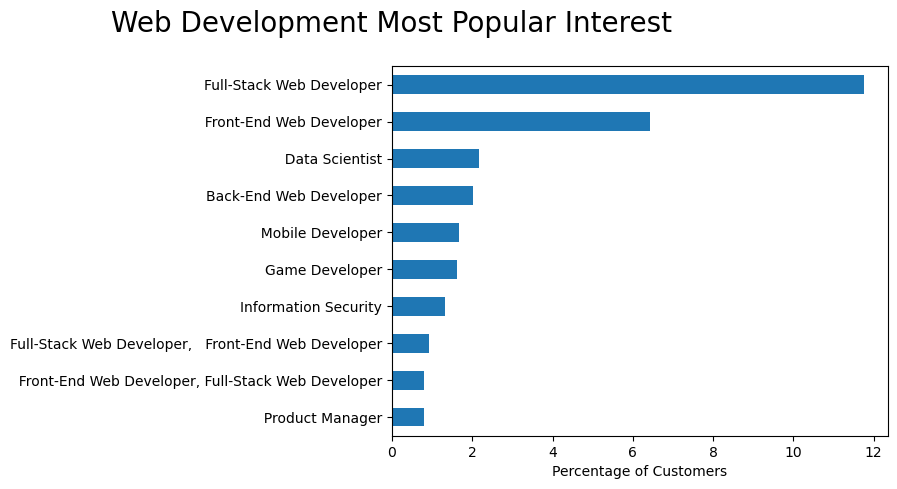

In [5]:
# Generate frequency distribution graph
role_interest_freq.iloc[:10][::-1].plot.barh()
plt.xlabel('Percentage of Customers')
plt.title('Web Development Most Popular Interest', size = 20, x = 0, y = 1.07)
plt.show()

From a quick scan of the table and plot, it is clear there is a customer base for the courses offered by the e-commerce learning, specifically for web and mobile development. However, we also see that customers are interested in more than one domain of learning. To understand the variation in the number of domains the customers are interested, a frequency distribution table will be generated showing the frequency of the number of roles a customer is interested in.

In [6]:
# Split column at comma and drop na values
split_role_interests = survey['JobRoleInterest'].str.split(',').dropna()
# Create series with number of interests per row
nr_interests = split_role_interests.apply(lambda x: len(x))
# Generate frequency table for number of interests
print(nr_interests.value_counts(normalize = True).sort_index()*100)

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


Here, we can see only 32% of customers focus on only one interest, with 68% of respondents focusing on multiple domains of learning. This should be beneficial as the e-learning company will be offering courses in multiple subjects.

As the focus of the courses is on web and mobile development, I will see how many respondents chose at least one of these interests.

In [32]:
# Frequency table
web_or_mobile = survey['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
wm_freq = web_or_mobile.value_counts(normalize = True) * 100
print(wm_freq)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


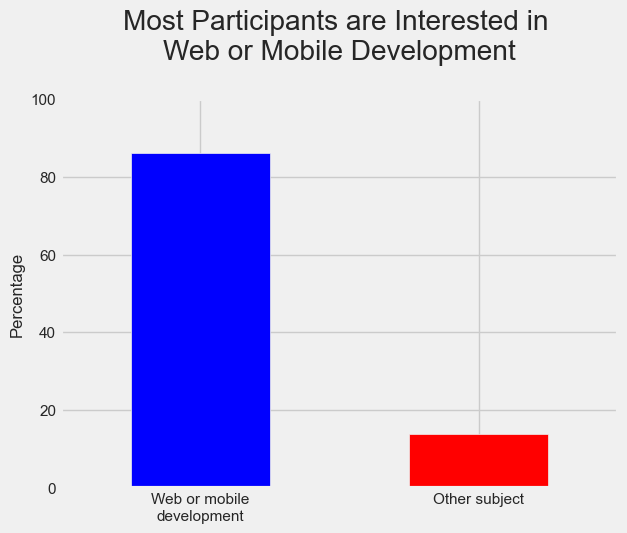

In [31]:
# Graph for the frequency table above
plt.style.use('fivethirtyeight')

wm_freq.plot.bar(color = ['Blue', 'Red'])
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer a strong reason to consider this sample representative for the population of interest. The e-learning company wants to advertise their courses to people interested in all sorts of programming niches but mostly web and mobile development.

# New Coders - Locations & Densities
Using the `CountryLive` column, I will be able to access where each respondent lives, with each country acting as an individual market. Therefore, I can frame the goal as finding the two best countries to advertise in, with an indicator of a good market being the number of potential customers. 

To ensure the sample is representative, I will drop all of the rows where respondents didn't answer what role they are interested in. As it cannot be determined what their interests truly are, it's best to leave their data out.

In [8]:
# Drop rows with na values in the JobRoleInterest column
interested = survey[survey['JobRoleInterest'].notnull()].copy()
# Generate absolute and relative frequency tables
interested_abs = interested['CountryLive'].value_counts()
interested_per = interested['CountryLive'].value_counts(normalize = True) * 100
# Format frequencies in readable format
interested_freq = pd.DataFrame({
    'Absolute Frequency': interested_abs,
    'Percentage': interested_per
})
interested_freq

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


Based on the results of the generated frequency distributions, it can be seen that the United States of America and India are the two largest markets to advertise in, with the USA's 45.7% potential market share significantly trumping India's 7.7%. Furthermore, the USA's 45% share is seen to be 10 times the UK's, which has the 3rd highest frequency. However, the difference between India's 7.7% and the UK and Canada's 4.6% and 3.8%, respectively, is significantly smaller.

This serves as useful information, but going into more depth and determining how much money people are *actually* willing to spend on learning is necessary. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for the e-learning company.

## Spending Money for Learning
The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The e-learning company sells subscriptions at a price of $59 per month, and for this reason I am interested in finding out how much money each student spends *per month*.

I will also now narrow down the analysis to only four countries: the USA, India, the UK, and Canada. Two reasons for this are:
* These are the countries that have the highest frequencies in the sample, which means there is a decent amount of data for each.
* The courses are written in English, and English is an official language in all four countries. The more people that know English, the better the chances of targeting the right people with advertisement.

In [9]:
# Calculate respondent monthly spend, replacing 0s for 1s
# 0s indicate first month of learning
interested['MonthsProgramming'] = interested['MonthsProgramming'].replace(0,1)
interested['MonthlySpend'] = interested['MoneyForLearning'] / interested['MonthsProgramming']
# Remove null values to group by CountryLive
spend = interested[interested['MonthlySpend'].notnull()]
spend = spend[spend['CountryLive'].notnull()]
# Group by CountryLive, containing only listed countries
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
country_spend = spend[spend['CountryLive'].isin(countries)].groupby('CountryLive')['MonthlySpend'].mean()
country_spend

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MonthlySpend, dtype: float64

The results for the UK and Canada are surprisingly low relative to the values seen for India. Consdiering a few socio-economical metrics (like GDP per capita), it can be intuitively expected that people in the UK and Canada would spend more on learning than people in India.

It may be due to a lack of representative data for the UK, Canada, and India, or there may be some outliers (potentially due to wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or the results may just be correct.

## Dealing with Extreme Outliers

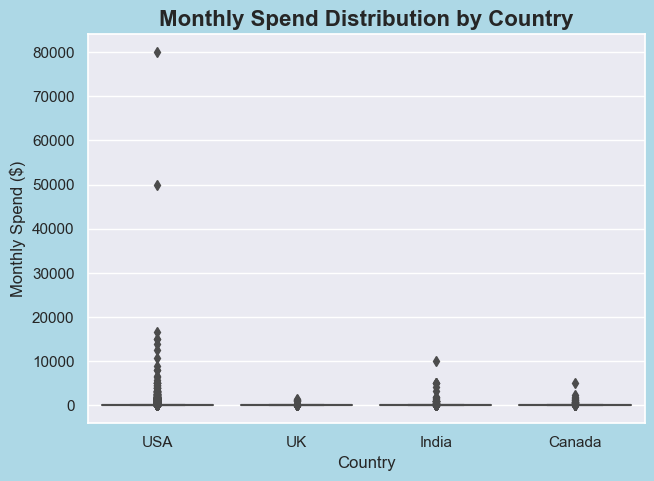

In [10]:
# Generate box plot for each country's monthly spend
def plot_monthly_spend():
    sns.set_theme()
    plt.rcParams['figure.facecolor'] = 'lightblue'
    ax = sns.boxplot(x = 'CountryLive', y = 'MonthlySpend', data = spend[spend['CountryLive'].isin(countries)])
    ax.set_xticklabels(['USA', 'UK', 'India', 'Canada'])
    plt.xlabel('Country')
    plt.ylabel('Monthly Spend ($)')
    plt.title('Monthly Spend Distribution by Country', size = 16, weight = 'bold')
    plt.show()

plot_monthly_spend()

It is currently challenging to identify outliers for the UK, India or Canada, however the extreme outliers from the USA can immediately be identified. It appears two people spend \\$50,000+ for e-learning a month, a highly unlikely value. As a result, any value above $20,000 will be removed.

In [11]:
# Remove monthly spend values of $20000
spend = spend[spend['MonthlySpend'] < 20000]
# Recompute mean values
country_spend = spend[spend['CountryLive'].isin(countries)].groupby('CountryLive')['MonthlySpend'].mean()
country_spend

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpend, dtype: float64

After recomputing the mean values, the USA's average monthly spend has dropped by 19.4% (~$44). Let's recreate the box plot now.

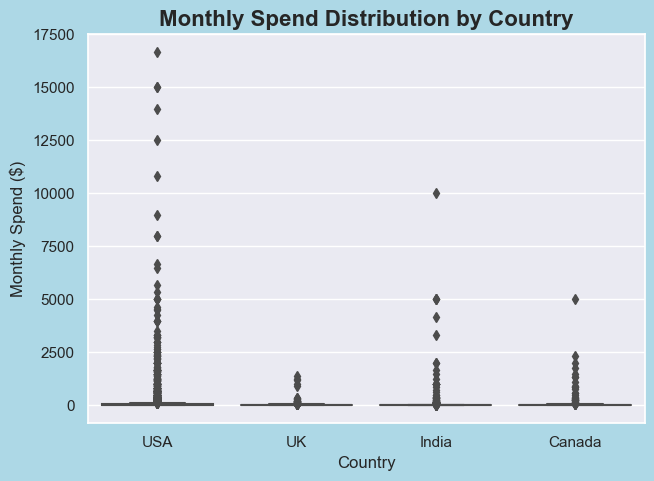

In [12]:
# Generate box plot for each country's monthly spend
plot_monthly_spend()

When assessing the distribution of India's `MonthlySpend`, extrreme outliers appear to be those values that are over $2500 per month. However, these may be genuine data points as forms of learning such as bootcamps can be quite expensive. Therefore assessing these data points is necessary.

In [13]:
spend[(spend['MonthlySpend'] >= 2500) & (spend['CountryLive'] == 'India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,N

It is clear that none of these respondents attended a bootcamp, and judging by the number of hours spent learning (`HoursLearning` variable), it is unlikely that these sums of money were truly spent on learning. The actual question of the survey was *"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"*. This question may have been misunderstood to include university tuition or the respondents may have inputted their monthly spend in Indian Rupees instead. Converting these values from Indian Rupees to US dollars makes the monthly spend values for these respondents slightly more believable.

In [14]:
india_outliers = spend[(spend['MonthlySpend'] >= 2500) & (spend['CountryLive'] == 'India')].copy()
india_outliers['MonthlySpend(US)'] = india_outliers['MonthlySpend'] * 0.012 # Current exchange rate as of 01/09/2023 21:04
india_outliers['MonthlySpend(US)']

1728      60.0
1755      40.0
7989      60.0
8126      60.0
13398    120.0
15587     50.0
Name: MonthlySpend(US), dtype: float64

In [15]:
from numpy import arange
# Find quartile values for non-outlier Indian respondents that have spent money 
spend[(spend['MonthlySpend'] != 0) &
      (spend['CountryLive'] == 'India') &
      (spend['MonthlySpend'] < 2500)]['MonthlySpend'].describe(percentiles = arange(0.1,1,0.1))

count     195.000000
mean      154.111562
std       338.256033
min         0.138889
10%         2.500000
20%         4.166667
30%         7.000000
40%        12.300000
50%        20.000000
60%        43.181818
70%        89.500000
80%       166.666667
90%       400.000000
max      2000.000000
Name: MonthlySpend, dtype: float64

After converting the potentially incorrect monthly spend values into US dollars and comparing these values with the distribution of India's monthly spend, it appears the values would fit on the right side of this distribution. All outlier values when converted fall between the 60th and 70th percentiles other than one, which falls between the 70th and 80th percentile. This makes it feasibly possible that these respondents forgot to convert their monthly spend to US dollars, however these rows will be omitted to be safe.

In [16]:
# Remove the outliers for India
spend = spend.drop(india_outliers.index) # using the row labels

Looking back at the box plot above, extreme outliers for the US can also be seen ($6000+). Examining these participants for bootcamp attendance is therefore necessary.

In [17]:
# Output rows for US extreme outliers 
spend[(spend['MonthlySpend'] >= 6000) & (spend['CountryLive'] == 'United States of America')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

From the observed 11 extreme outliers, six of the respondents attended a bootcamp, resulting in them having a high monthly spend value. However, the remaining five respondents did not attend a bootcamp, meaning a monthly spend of $6000 is highly improbable so these rows will be removed. 

Furthermore, the data shows that eight of the 11 respondents had only programmed for a maximum of three months. These respondents were likely to have paid a large sum of money for a bootcamp that lasted several months, meaning the resulting monthly spend value isn't true to the number of months they have actually been learning for (as they didnt' spend anything for the next few months after the survey). These eight rows will also be removed.

Therefore, I will complete the following: Remove respondents that:
* Didn't attend a bootcamp
* Have been programming for three months or less upon completion of the survey

In [18]:
# Remove US outliers with 3 months or less programming exp. or no bootcamp
spend = spend[~((spend['MonthlySpend'] >= 6000) &    # Greater than 6000
               (spend['CountryLive'] == 'United States of America') &   # US outlier
               ((spend['MonthsProgramming'] < 4) | (spend['AttendedBootcamp'] == 0)))]  # 3 months or less programming exp
                                                                                        # or no bootcamp

Looking back at the previous box plot, an extreme outlier can be seen in Canada's distribution that requires further investigation.

In [19]:
spend[(spend['CountryLive'] == 'Canada') & (spend['MonthlySpend'] > 4500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This respondent follows the same pattern that is observed by some of the US respondents in that they have paid a large sum of money for a bootcamp they are yet to complete, resulting in a significantly inflated monthly spend value. Therefore, this row will also be removed.

In [20]:
# Remove Canada extreme outlier
spend = spend[~((spend['CountryLive'] == 'Canada') & (spend['MonthlySpend'] > 4500))]

I can now repeat the process of observing the mean values and producing a box plot to compare distributions.

In [21]:
# Recompute mean values
country_spend = spend[spend['CountryLive'].isin(countries)].groupby('CountryLive')['MonthlySpend'].mean()
country_spend

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MonthlySpend, dtype: float64

The new mean values outputted show an average monthly spend decrease of:
* 18% in Canada
* 51.3% in India
* 5% in USA

## Choosing the Two Best Markets

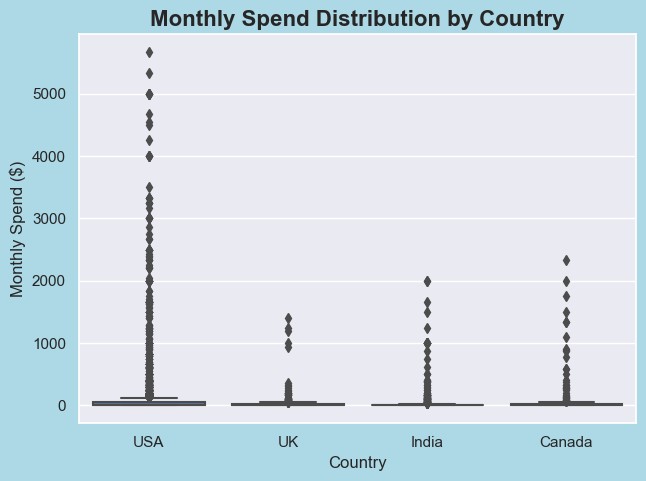

In [22]:
# Generate box plot for each country's monthly spend
plot_monthly_spend()

From assessing both the mean `MonthlySpend` value for each country as well as their distributions, it is clear that the USA is country in which advertising should definitely be targeted towards. However, deciding the second country to advertise in is still not definitively clear.

On the one hand, Canadian respondents spend \\$93 on average a month towards their online learning whereas Indian respondents spend \\$66, suggesting that potential customers in Canada would be more willing to spend \\$59 on an e-learning course. Yet, when assessing the number of potential customers in each market, it is clear that India has the greater potential customer base. Better yet, the average monthly spend value for Indian respondents still demonstrates a propensity to spend $59 on an e-learning course. Therefore it may be best to advertise in both the USA and India, but splitting the advertising budget.
* 70% advertising budget goes towards the United States of America
* 30% advertising budgest goes towards India

This is likely enough analysis for this current stage. The company's marketing team would likely be able to use this analysis and apply their domain knowledge to decide on a potentially more appropriate marketing plan. This may first require further research in the form of extra surveys in India and Canada before completing further analysis.

## Conclusion
In this project, I analysed survey data from new coders to find the best two markets to advertise a e-learning course in web and mobile development. The definitive conclusion that can be reached is that the USA is the best market to advertise in based on potential customer base and average monthly spend. The second best market is less clear-cut, with a choice between India and Canada. This can be made more clear through further surveys being completed and a marketing team applying domain knowledge.